# Overview

**Big 10** companies of the `S&P500`index are: Apple, Microsoft, Amazon, Facebook, Google (Class A & C), Berkshire Hathaway, Johnson & Johnson, JPMorgan Chase, and Visa. These companies take up more than quarter of the total index in performance and reliable stocks that get recommended by many in their introduction to investing. 

This notebook will take advantage of ARIMA tools built based `S&P500` EDA notebook `spy_stock_eda.ipynb` and quickly explorer the behavior of **Big 10** and recommended ARIMA order for predicting their prices. 


## Objective
1. Visualize stock price and check stationarity
2. Calculate lag stationarity and AR order of the given stock price for ARIMA model
3. Determine optimal ARIMA order for each stock and save records

## Libraries Import

In [1]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

from datetime import datetime, timedelta

import plotly.graph_objects as go
import plotly.express as px

import sys
sys.path.append('../')

import src.tda_api_tools as tda
from src.arima_tools import arima_tools
import src.plotly_tools as pt

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', category=UserWarning)

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

%matplotlib inline

## Data

Below is the list of symbols of **Big 10** stocks.

In [2]:
symbols=["AAPL", "MSFT", "AMZN", "FB", "GOOGL", "GOOG", "BRK.B", "JNJ", "JPM", "V"] #big 10 symbols to collect

In [3]:
at = arima_tools()

## EDA

### Apple (AAPL)

In [17]:
symbol = "AAPL"
file_path = "../data/{}_daily01.csv".format(symbol)
data_df = pd.read_csv(file_path, index_col="datetime")
data_df.index = pd.to_datetime(data_df.index)

In [18]:
# candlestick
pt.make_candlestick(data_df, symbol, True);

#### Closing Price Stationarity

Closing price of AAPL showed stationarity likeliness on it's difference order of 1. 

In [19]:
at.adf_test(data_df.close)

series name                       close
Test Statistic                  1.62442
p-value                        0.997929
#Lags Used                           18
Number of Observations Used        1295
reject null hypothesis            False
Critical Value (1%)            -3.43541
Critical Value (5%)            -2.86377
Critical Value (10%)           -2.56796
dtype: object

In [20]:
at.adf_test(data_df.close.diff().dropna())

series name                          close
Test Statistic                    -7.23907
p-value                        1.90528e-10
#Lags Used                              23
Number of Observations Used           1289
reject null hypothesis                True
Critical Value (1%)               -3.43543
Critical Value (5%)               -2.86378
Critical Value (10%)              -2.56797
dtype: object

In [21]:
at.find_lag_stationary(data_df.close)

1

{'close': 2}

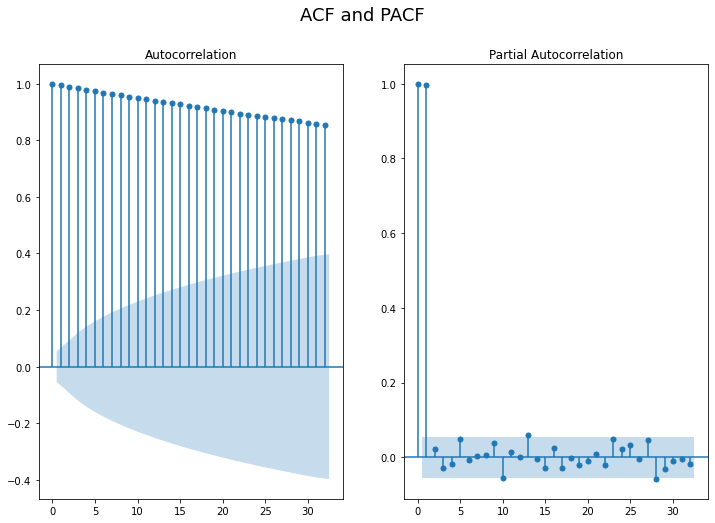

In [22]:
at.pacf_order(data_df, plot=True)

#### Moving Average Crossovers

In [23]:
plot_df = at.moving_averages(data_df)
plot_df = plot_df[plot_df.index > "2020-01-01"]

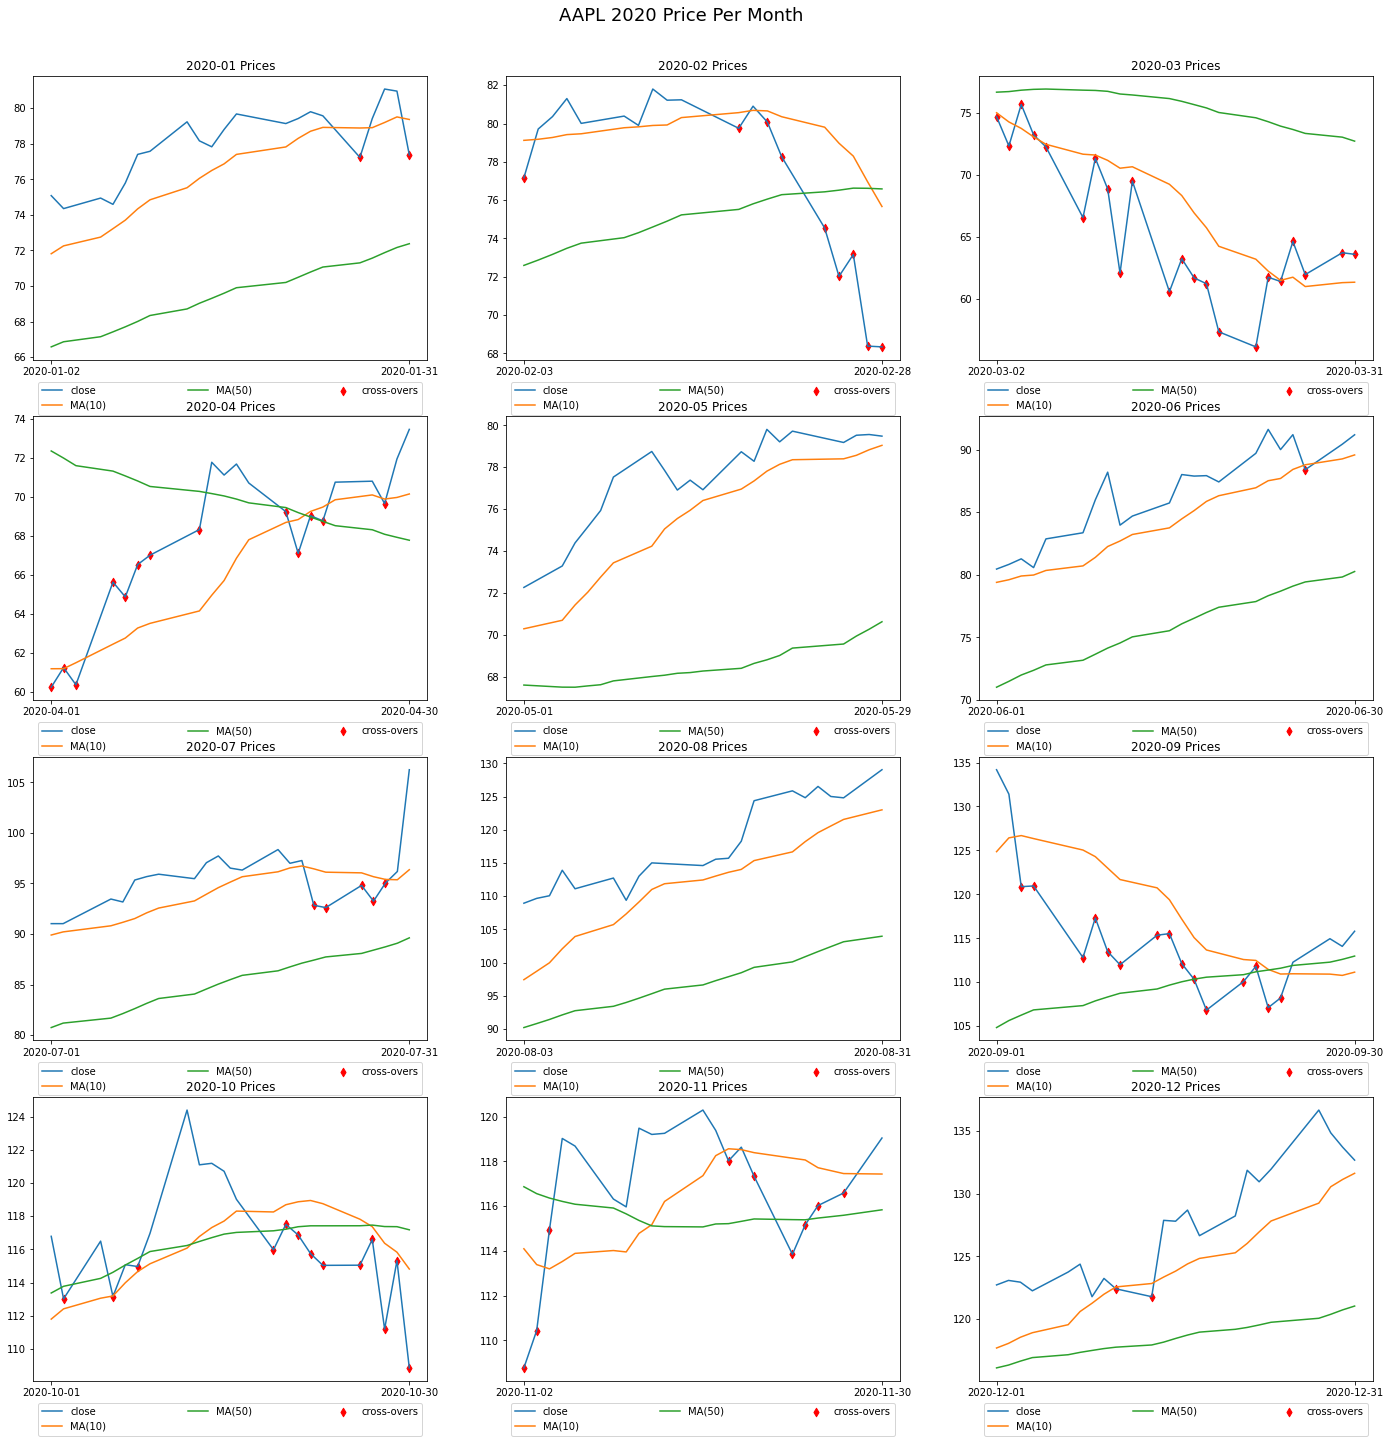

(<Figure size 1728x1728 with 12 Axes>,
 array([[<AxesSubplot:title={'center':'2020-01 Prices'}>,
         <AxesSubplot:title={'center':'2020-02 Prices'}>,
         <AxesSubplot:title={'center':'2020-03 Prices'}>],
        [<AxesSubplot:title={'center':'2020-04 Prices'}>,
         <AxesSubplot:title={'center':'2020-05 Prices'}>,
         <AxesSubplot:title={'center':'2020-06 Prices'}>],
        [<AxesSubplot:title={'center':'2020-07 Prices'}>,
         <AxesSubplot:title={'center':'2020-08 Prices'}>,
         <AxesSubplot:title={'center':'2020-09 Prices'}>],
        [<AxesSubplot:title={'center':'2020-10 Prices'}>,
         <AxesSubplot:title={'center':'2020-11 Prices'}>,
         <AxesSubplot:title={'center':'2020-12 Prices'}>]], dtype=object))

In [24]:
at.month_breakdown_grid(plot_df, "AAPL")

### Microsoft (MSFT)

Same method can be apply to the MSFT data. This price data also behave similarly to S&P500 and AAPL in that the recommeded starting ARIMA order is (2, 1, n). 

In [11]:
symbol = "MSFT"
file_path = "../data/{}_daily01.csv".format(symbol)
data_df = pd.read_csv(file_path, index_col="datetime")

In [12]:
# candlestick
pt.make_candlestick(data_df, symbol, True);

#### Closing Price Stationarity

Closing price of AAPL showed stationarity likeliness on it's difference order of 1. 

In [13]:
at.adf_test(data_df.close)

series name                       close
Test Statistic                  1.03009
p-value                        0.994574
#Lags Used                           10
Number of Observations Used        1303
reject null hypothesis            False
Critical Value (1%)            -3.43538
Critical Value (5%)            -2.86376
Critical Value (10%)           -2.56795
dtype: object

In [14]:
at.adf_test(data_df.close.diff().dropna())

series name                          close
Test Statistic                    -8.74504
p-value                        2.93832e-14
#Lags Used                              23
Number of Observations Used           1289
reject null hypothesis                True
Critical Value (1%)               -3.43543
Critical Value (5%)               -2.86378
Critical Value (10%)              -2.56797
dtype: object

In [15]:
at.find_lag_stationary(data_df.close)

1

{'close': 2}

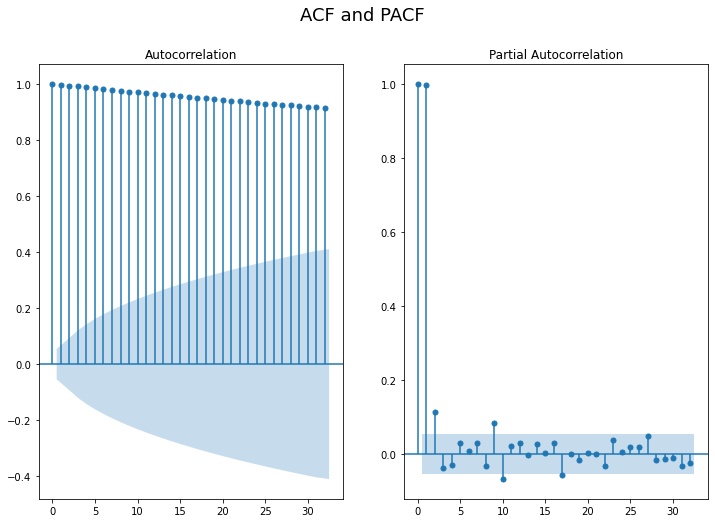

In [16]:
at.pacf_order(data_df, plot=True)

## Determining Others

In [21]:
pd_list = []
for sym in symbols:
    file_path = "../data/{}_daily01.csv".format(symbol)
    data_df = pd.read_csv(file_path, index_col="datetime")
    p = at.pacf_order(data_df)["close"]
    d = at.find_lag_stationary(data_df.close)
    pd_list.append((p,d))
    
arima_orders = dict(zip(symbols, pd_list))

In [22]:
arima_orders

{'AAPL': (2, 1),
 'MSFT': (2, 1),
 'AMZN': (2, 1),
 'FB': (2, 1),
 'GOOGL': (2, 1),
 'GOOG': (2, 1),
 'BRK.B': (2, 1),
 'JNJ': (2, 1),
 'JPM': (2, 1),
 'V': (2, 1)}